In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_before = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
one_year_data = session.query(*sel).\
    filter(Measurement.date >= one_year_before).all()
display (one_year_data)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_data = pd.DataFrame(one_year_data, columns= ["date", "prcp_inches"])
one_year_data['date'] = pd.to_datetime(one_year_data['date'])
# Sort the dataframe by date
sorted_one_year_data = one_year_data.sort_values(by='date')
display(sorted_one_year_data.to_json())


# Close the session
session.close()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

'{"date":{"0":1471910400000,"1009":1471910400000,"1529":1471910400000,"704":1471910400000,"361":1471910400000,"1881":1471910400000,"1192":1471910400000,"1":1471996800000,"1530":1471996800000,"705":1471996800000,"1010":1471996800000,"1882":1471996800000,"1193":1471996800000,"362":1471996800000,"2":1472083200000,"706":1472083200000,"1194":1472083200000,"1531":1472083200000,"1011":1472083200000,"1883":1472083200000,"363":1472083200000,"364":1472169600000,"1532":1472169600000,"1195":1472169600000,"1012":1472169600000,"707":1472169600000,"3":1472169600000,"365":1472256000000,"1533":1472256000000,"4":1472256000000,"1196":1472256000000,"708":1472256000000,"1884":1472256000000,"1534":1472342400000,"709":1472342400000,"5":1472342400000,"1197":1472342400000,"366":1472342400000,"1885":1472342400000,"6":1472428800000,"1013":1472428800000,"710":1472428800000,"1198":1472428800000,"367":1472428800000,"1886":1472428800000,"1535":1472428800000,"1536":1472515200000,"1014":1472515200000,"368":14725152000

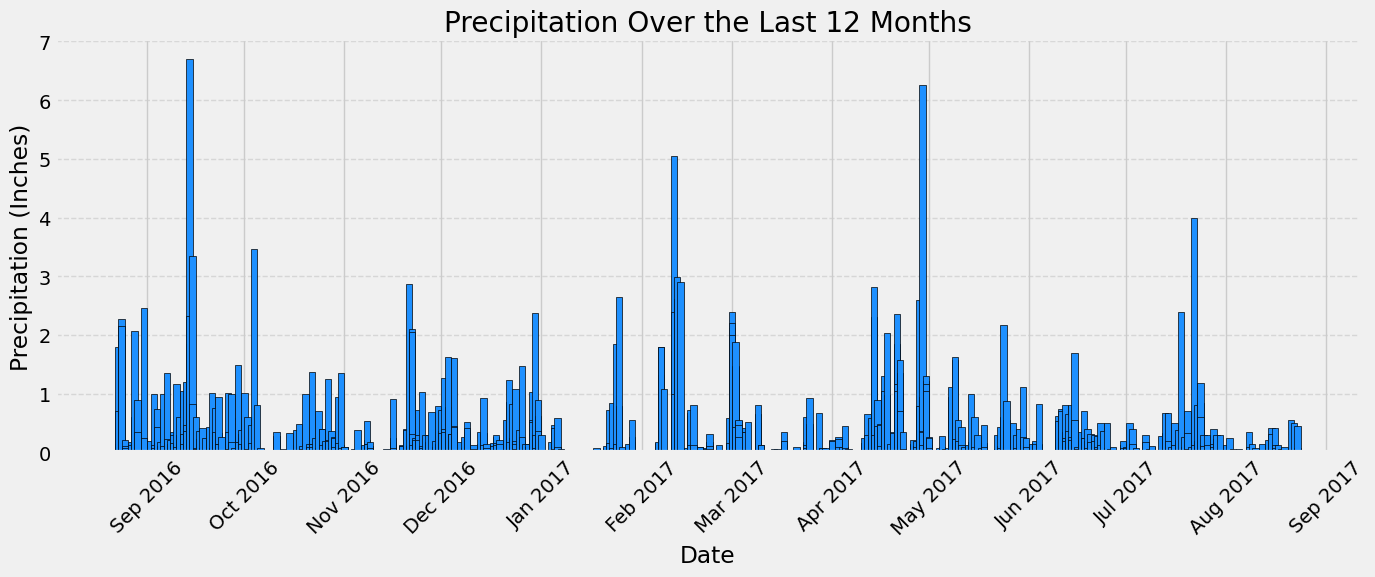

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(sorted_one_year_data["date"], sorted_one_year_data["prcp_inches"], 
       color="dodgerblue", edgecolor="black", width=2)

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (Inches)")
ax.set_title("Precipitation Over the Last 12 Months")

# Format x-axis to show months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.xticks(rotation=45)  # Rotate for better readability
ax.yaxis.grid(True, linestyle="--", alpha=0.7)  # Add horizontal grid lines

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = sorted_one_year_data['prcp_inches'].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp_inches, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()

print((f"Number of stations: {total_stations}"))

Number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(
    Measurement.station, 
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in active_stations:
        print(f"{station}, {count}")


USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'  
temperature_data = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

temperature_data

[(54.0, 85.0, 71.66378066378067)]

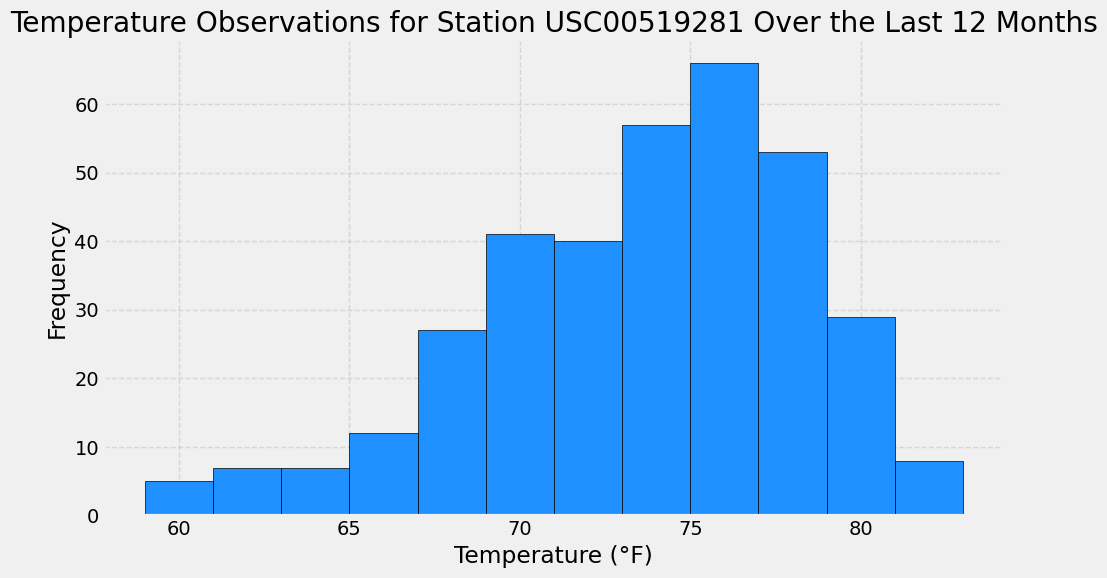

In [15]:
# Calculate the date for one year ago from the most recent date
active_station_query = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .first()

# Query the last 12 months of temperature observation data for the most active station
active_station_id = 'USC00519281'

# Step 2: Calculate the date one year prior from the most recent date in the dataset
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date = dt.datetime.strptime(latest_date, "%Y-%m-%d").date() 
one_year_before = latest_date - dt.timedelta(days=365)

# Step 3: Query the last 12 months of temperature observation data for this station
temperature_data = session.query(Measurement.tobs) \
    .filter(Measurement.station == active_station_id) \
    .filter(Measurement.date >= one_year_before) \
    .all()

# Convert the query results to a list of temperatures
temperatures = [temp[0] for temp in temperature_data]

# Step 4: Plot the temperature data as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=12, color='dodgerblue', edgecolor='black')
plt.title(f"Temperature Observations for Station {active_station_id} Over the Last 12 Months")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Close the session
session.close()


# Close Session

In [16]:
# Close Session
session.close()